In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [86]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [87]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.640460,2.258930,-0.229904,-0.886448,1.422523,1
1,-2.425968,3.313140,-1.171554,1.178467,-3.208346,1
2,-1.750801,1.077496,-1.283810,-1.997434,4.651315,0
3,0.534422,0.951821,-0.940776,-0.745553,0.722683,0
4,0.283126,0.075522,-1.456952,-0.469151,2.858011,0


In [88]:
# function for row sampling
def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [89]:
# function for feature sampling
import random
def feature_sampling(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [90]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_row(df,row_percent)
    return feature_sampling(new_df,col_percent)

In [91]:
sample_row(df,0.1)

,col1,col2,col3,col4,col5,target
40,-0.685878,1.282046,-1.229525,0.210518,1.211925,0
94,-0.985314,1.025160,-2.089922,1.746595,0.748414,1
99,-1.168274,0.674792,0.219297,2.426250,2.284981,1
12,-1.979030,1.847937,0.326048,1.699020,0.226610,1
7,-1.437481,1.526196,-1.704184,1.920815,0.133713,1
17,0.116550,0.554227,-2.561198,0.465893,0.473872,1
97,-3.548824,0.668037,-0.211961,-1.263677,-0.107309,0
40,-0.685878,1.282046,-1.229525,0.210518,1.211925,0
81,-0.581376,0.199685,-0.980103,-0.120237,2.585364,1
76,-0.931249,1.454727,-1.382108,0.368445,-2.642379,0


In [92]:
feature_sampling(df,0.5)

C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_10932\2608321570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col3,target
0,-3.640460,-0.229904,1
1,-2.425968,-1.171554,1
2,-1.750801,-1.283810,0
3,0.534422,-0.940776,0
4,0.283126,-1.456952,0
...,...,...,...
95,-1.879802,-1.488168,1
96,-2.387068,-0.374358,1
97,-3.548824,-0.211961,0
98,0.309117,-1.964393,1


In [93]:
combined_sampling(df,0.1,0.5)

C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_10932\2608321570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col1,target
1,1.178467,-2.425968,1
84,-0.076667,-3.489971,1
58,2.899633,-2.491868,1
32,2.435172,-0.979185,1
80,-3.086813,-1.131635,0
52,-0.693412,-0.742867,1
91,-1.861792,0.919963,0
24,2.546994,0.987388,1
86,-1.581498,-2.523669,0
43,0.635716,-1.503421,0


In [94]:
df1 = sample_row(df,0.2)
df2 = sample_row(df,0.2)
df3 = sample_row(df,0.2)

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [96]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[2] <= -1.21\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.3, 0.7, 'x[0] <= -1.778\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.5, 'x[0] <= -1.937\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.7, 'x[3] <= -1.377\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'x[1] <= 0.491\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.7, 0.3, 'x[1] <= 0.23\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

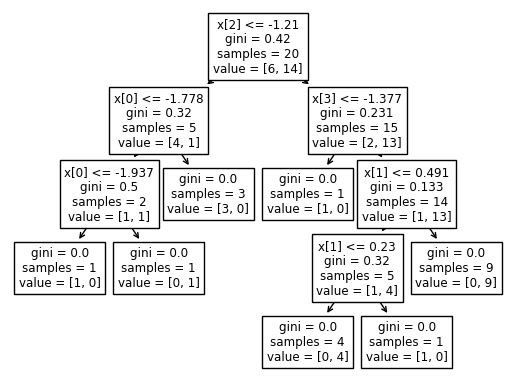

In [97]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= -0.473\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

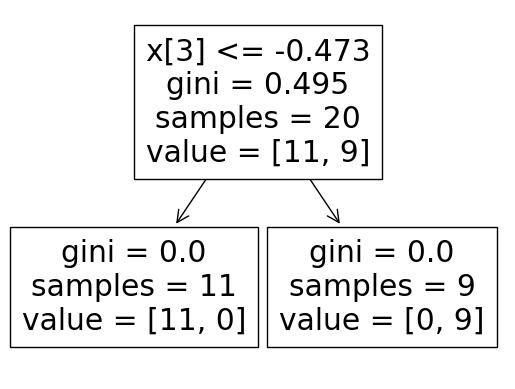

In [98]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.268\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.5, 'x[1] <= 0.16\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

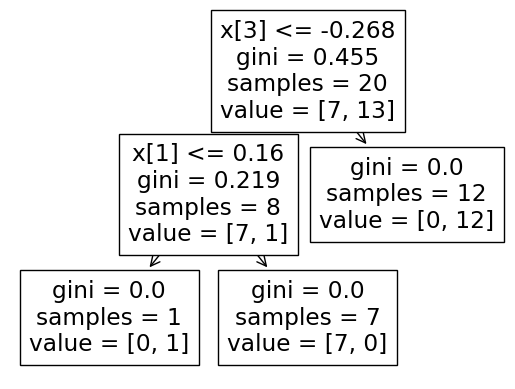

In [99]:
plot_tree(clf3)

In [104]:
clf1.predict(np.array([0.116550, 0.554227, -2.561198, 0.465893,	0.473872]).reshape(1,5))

c:\Users\Yash Mistry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [105]:
clf2.predict(np.array([0.116550, 0.554227, -2.561198, 0.465893,	0.473872]).reshape(1,5))

c:\Users\Yash Mistry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [106]:
clf3.predict(np.array([0.116550, 0.554227, -2.561198, 0.465893,	0.473872]).reshape(1,5))

c:\Users\Yash Mistry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [107]:
feature_sampling(df,0.8)

C:\Users\Yash Mistry\AppData\Local\Temp\ipykernel_10932\2608321570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col2,col4,col3,target
0,1.422523,2.258930,-0.886448,-0.229904,1
1,-3.208346,3.313140,1.178467,-1.171554,1
2,4.651315,1.077496,-1.997434,-1.283810,0
3,0.722683,0.951821,-0.745553,-0.940776,0
4,2.858011,0.075522,-0.469151,-1.456952,0
...,...,...,...,...,...
95,3.234941,0.591845,-0.155580,-1.488168,1
96,-0.880188,2.459939,1.489605,-0.374358,1
97,-0.107309,0.668037,-1.263677,-0.211961,0
98,0.669883,0.408312,0.827222,-1.964393,1


In [ ]:
# same we can do with feature_sampling and combined_sampling